In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [ ]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Coat')

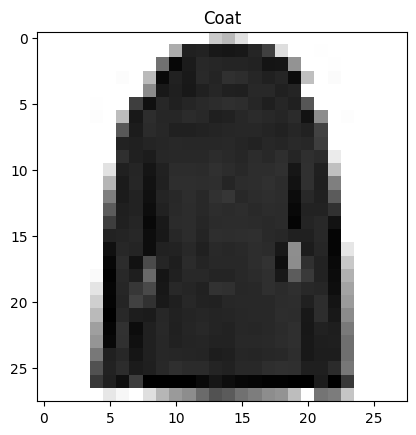

In [ ]:
import matplotlib.pyplot as plt
image = 2000
plt.imshow(train_data[image], cmap=plt.cm.binary)
plt.title(class_name[train_labels[image]])

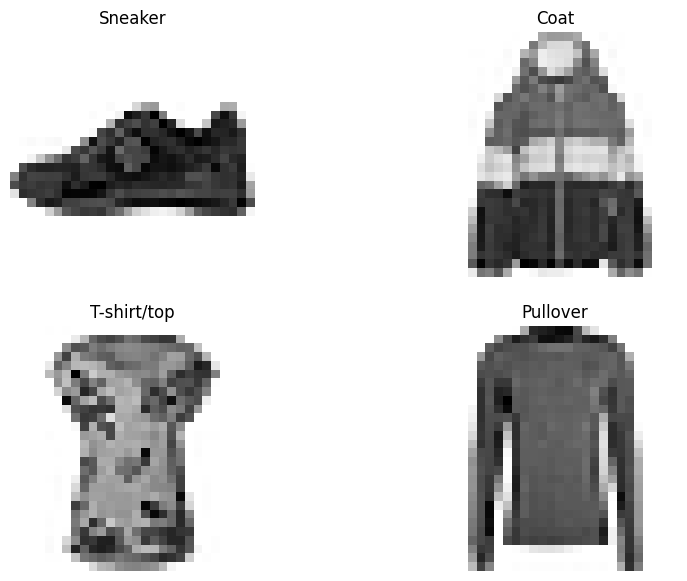

In [ ]:
import random
plt.figure(figsize=(10, 7))
for i in range(4):
  ax = plt.subplot(2, 2, 1+i)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
train_data.max()

255

In [ ]:
norm_train_data = train_data / 255
norm_test_data = test_data / 255

In [ ]:
norm_train_data[0][3].max()

0.28627450980392155

In [ ]:
tf.random.set_seed(42)

model_non_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_non_norm.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['accuracy'])

model_non_norm_history = model_non_norm.fit(train_data,
                                            tf.one_hot(train_labels, depth=10),
                                            epochs=20,
                                            validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1712 - loss: 3.4559 - val_accuracy: 0.2719 - val_loss: 1.9158
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3158 - loss: 1.8183 - val_accuracy: 0.4280 - val_loss: 1.5011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4401 - loss: 1.4487 - val_accuracy: 0.4778 - val_loss: 1.2638
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5115 - loss: 1.2127 - val_accuracy: 0.5713 - val_loss: 1.0681
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5760 - loss: 1.0518 - val_accuracy: 0.6269 - val_loss: 0.9986
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6636 - loss: 0.9110 - val_accuracy: 0.6409 - val_loss: 0.9174
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6884 - loss: 0.8344 - val_accuracy: 0.6729 - val_loss: 0.8234
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6948 - loss: 0.8016 - 

In [ ]:
tf.random.set_seed(42)

norm_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

norm_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

norm_history = norm_model.fit(norm_train_data,
                         train_labels,
                         epochs=20,
                         validation_data=(norm_test_data, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5198 - loss: 1.3641 - val_accuracy: 0.7582 - val_loss: 0.7323
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7736 - loss: 0.6741 - val_accuracy: 0.7790 - val_loss: 0.6488
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7929 - loss: 0.6031 - val_accuracy: 0.7883 - val_loss: 0.6213
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8012 - loss: 0.5761 - val_accuracy: 0.7916 - val_loss: 0.6061
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8066 - loss: 0.5604 - val_accuracy: 0.7972 - val_loss: 0.5937
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8103 - loss: 0.5488 - val_accuracy: 0.8007 - val_loss: 0.5872
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8125 - loss: 0.5400 - val_accuracy: 0.8026 - val_loss: 0.5822
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8152 - loss: 0.5324 - 

# Finding Learning Rate

In [ ]:
tf.random.set_seed(42)

lr_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

lr_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

lr_history = lr_model.fit(norm_train_data,
                          train_labels,
                          epochs=40,
                          callbacks=[lr_scheduler],
                          validation_data=(norm_test_data, test_labels))

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7615 - loss: 0.6866 - val_accuracy: 0.8461 - val_loss: 0.4142 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8596 - loss: 0.3875 - val_accuracy: 0.8546 - val_loss: 0.3894 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8710 - loss: 0.3500 - val_accuracy: 0.8617 - val_loss: 0.3725 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8784 - loss: 0.3275 - val_accuracy: 0.8648 - val_loss: 0.3702 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8821 - loss: 0.3161 - val_accuracy: 0.8613 - val_loss: 0.3795 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8864 - loss: 0.3079 - val_accuracy: 0.8628 - val_loss: 0.3745 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8873 - 

<Axes: >

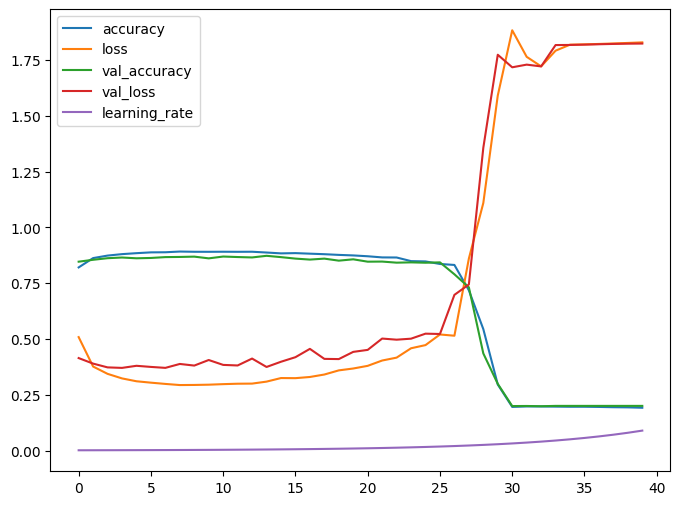

In [ ]:
pd.DataFrame(lr_history.history).plot(figsize=(8, 6))

Text(0, 0.5, 'Epochs')

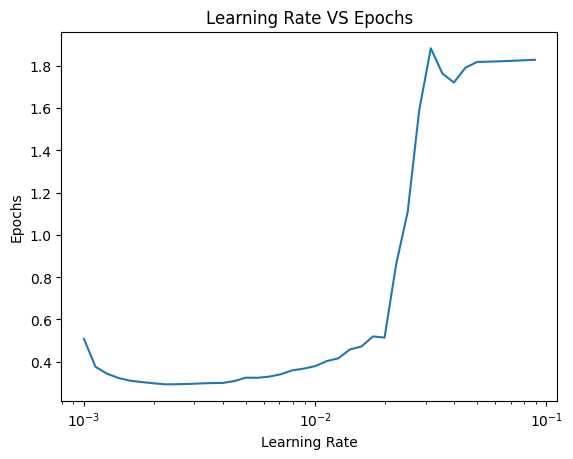

In [ ]:
lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, lr_history.history['loss'])
plt.title('Learning Rate VS Epochs')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs')

In [ ]:
tf.random.set_seed(42)

after_lr_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

after_lr_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                       metrics=['accuracy']
                      )

after_lr_history = after_lr_model.fit(norm_train_data,
                                      train_labels,
                                      epochs=20,
                                      validation_data=(norm_test_data, test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7642 - loss: 0.6547 - val_accuracy: 0.8393 - val_loss: 0.4440
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8549 - loss: 0.4011 - val_accuracy: 0.8482 - val_loss: 0.4143
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8702 - loss: 0.3606 - val_accuracy: 0.8549 - val_loss: 0.3897
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8775 - loss: 0.3365 - val_accuracy: 0.8579 - val_loss: 0.3898
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8815 - loss: 0.3222 - val_accuracy: 0.8600 - val_loss: 0.3846
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8840 - loss: 0.3101 - val_accuracy: 0.8652 - val_loss: 0.3827
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8899 - loss: 0.2958 - val_accuracy: 0.8594 - val_loss: 0.3899
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8907 - loss: 0.293

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import itertools
import numpy as np

figsize=(10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
          xlabel="Predicted Label",
          ylabel="True Label",
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [ ]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs = after_lr_model.predict(norm_test_data)
y_preds = y_probs.argmax(axis=1)
confusion_matrix(test_labels,y_preds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[760,   1,  28,  54,   4,   1, 141,   0,  11,   0],
       [  2, 951,   0,  33,  10,   0,   1,   1,   2,   0],
       [  9,   3, 821,  19, 110,   0,  35,   0,   3,   0],
       [  9,   6,   9, 898,  48,   0,  27,   0,   3,   0],
       [  0,   2, 119,  27, 829,   0,  22,   0,   1,   0],
       [  0,   0,   0,   1,   0, 952,   0,  22,   4,  21],
       [ 77,   1, 137,  45, 103,   1, 626,   0,  10,   0],
       [  0,   0,   0,   0,   0,  19,   0, 968,   0,  13],
       [  3,   0,   6,   5,   5,   2,   4,   3, 972,   0],
       [  0,   1,   0,   0,   0,  13,   1,  49,   0, 936]])

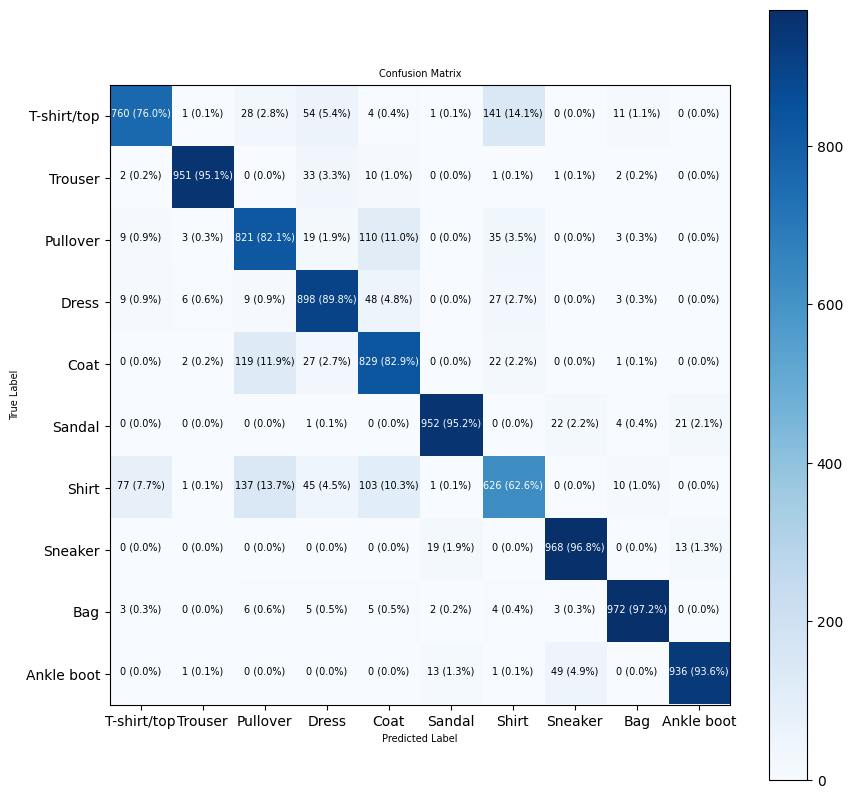

In [ ]:
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_name, figsize=figsize, text_size=7)

In [ ]:
def plot_random_image(model, image, true_labels, classes):

  i = random.randint(0, len(test_data))

  target_image = image[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
   color = "green"
  else:
    color = "red"

  plt.xlabel(f"Pred : {pred_label} {100*tf.reduce_max(pred_probs):.2f} % True : {true_label}", color=color)
  plt.grid(False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


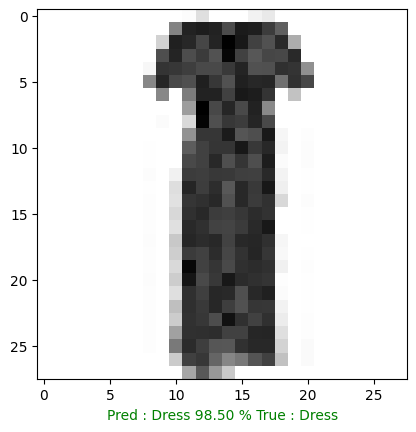

In [ ]:
plot_random_image(after_lr_model, image=norm_test_data, true_labels=test_labels, classes=class_name)